In [2]:
import ribosomesimulator as r
from time import process_time_ns
import matplotlib.pyplot as plt
import numpy as np

In [262]:
sim = r.ribosomesimulator()
props = sim.getPropensities()

##depending on which of the following two lines is used, the model
##is run with or without incluson of near-cognate tRNAs.

#sim.loadConcentrations('Scer_concentrations_no_nearcognates.csv')
sim.loadConcentrations('Scer_concentrations.csv')

sim.setCodonForSimulation('CUU')

##outcomment the following line to run a simulation without non-cognates

sim.setNonCognate(False)

decoding_times= []
x = 100000
cycle_time_ns,decoding_times_s = [],[]
for n1 in range(100):
    start=process_time_ns()
    for n2 in range (x):
        sim.run_and_get_times()
    cycle_time_ns.append((process_time_ns()-start)/(1000* x))
for n in range(x):
    decoding_times_s.append(np.sum(sim.run_and_get_times()))

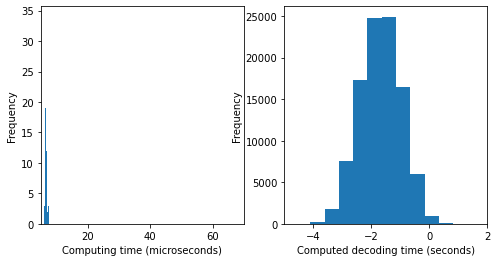

In [263]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].hist(cycle_time_ns[5:-5])
ax[0].set_xlabel('Computing time (microseconds)')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim((5,70))
ax[1].hist(np.log(decoding_times_s[5:-5]))
ax[1].set_xlabel('Computed decoding time (seconds)')
ax[1].set_ylabel('Frequency')
ax[1].set_xlim((-5,2))
plt.savefig('Computing_time_without_near_noncognates.svg')
plt.show()

In [4]:
sim = r.ribosomesimulator()
sim.loadConcentrations('Scer_concentrations.csv')
sim.setCodonForSimulation('CUU')
np.log(sim.run_repeatedly_get_average_time(100000))

-0.3825113459350932